In [1]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
from pandas import read_csv, concat, DataFrame, Grouper

In [3]:
series = read_csv('daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)

This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. 

A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

<AxesSubplot:>

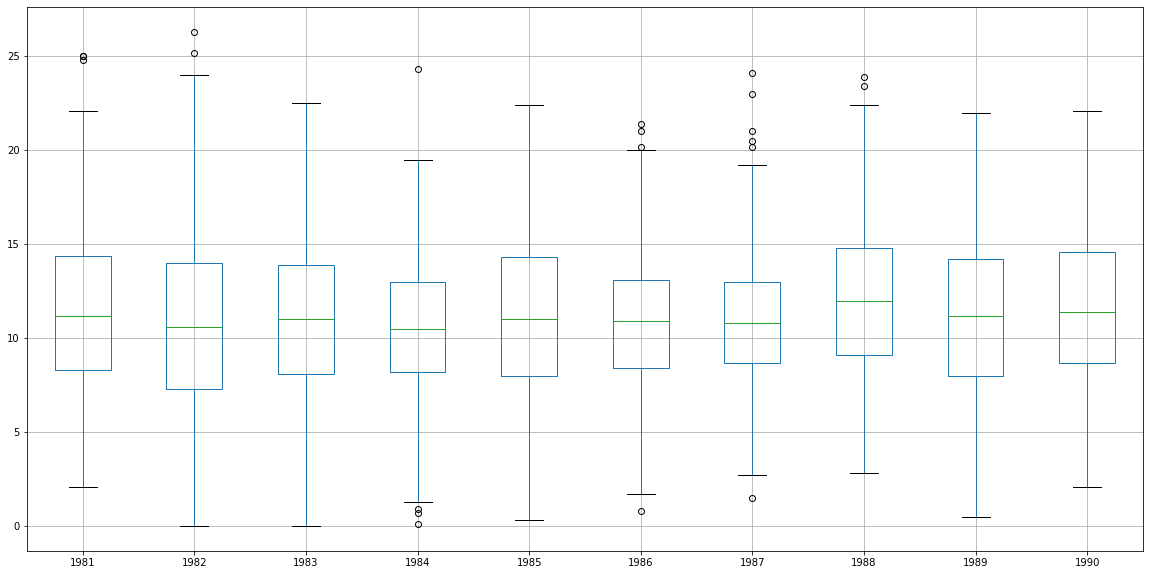

In [4]:
groups = series.groupby(Grouper(freq='Y'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()

<AxesSubplot:>

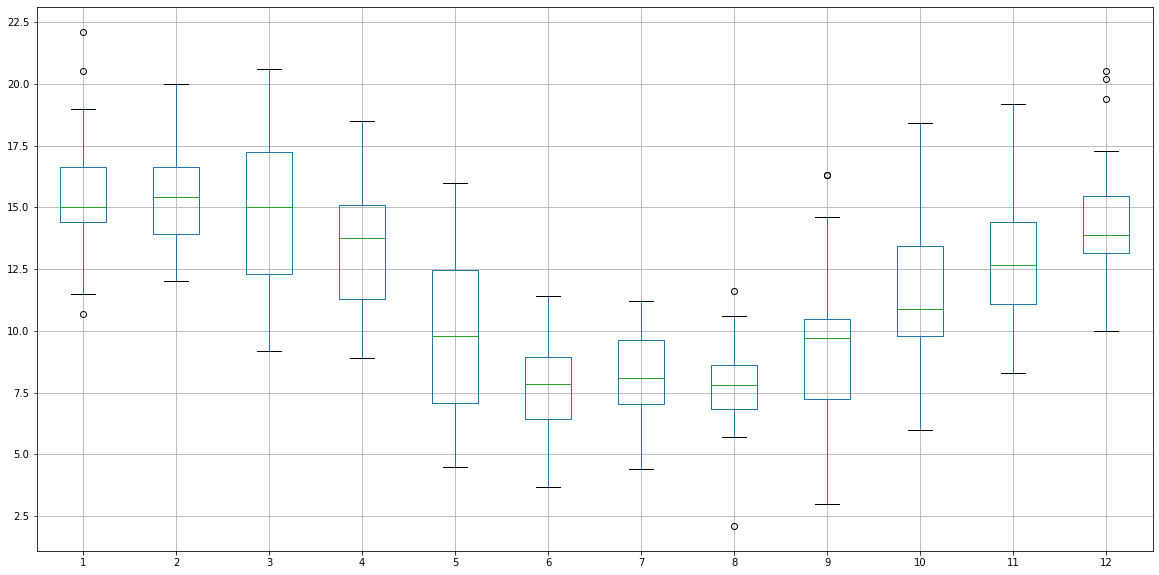

In [5]:
year = series['1990']
groups = year.groupby(Grouper(freq='M'))
months = concat([DataFrame(group.values) for _, group in groups], axis=1)
months = DataFrame(months)
months.columns = range(1, 13)
months.boxplot()